# **Análisis Discriminante lineal**

El objetivo del Análisis Discriminante lineal (LDA) es encontrar el subespacio de características que optimiza la separabilidad de las clases y es una técnica supervisada.
El LDA como se conoce actualmente para múltiples clases, funciona bajo la suposición de que las clases tienen matrices de covarianza iguales y las clases tienen distribuciones normales. Otra suposición es que las instancias en el conjunto de entrenamiento son independientes entre si. Si una o más de una de las suposiciones anteriores no se cumplieran, la técnica del LDA funciona bastante bien.

## Pasos en el análisis discriminante lineal



Sea un conjunto de datos $\mathbf{X}$ de dimensiones $n\times d$ de $d$ características y n instancias:



1.   Normalizar los datos $d$-dimensionales.
2.   Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i=\frac{1}{n_i}\sum_{\mathbf{x}\in D_i} \mathbf{x}_m$$
3.   Calcular las matrices: matriz de dispersión entre clases $\mathbf{S}_B$ y matriz de dispersión intra clase $\mathbf{S}_W$.
4.   Calcular los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.
5.   Ordenar los autovectores en orden decreciente a los autovalores y Seleccionar $k$ autovectores que correspondan a los $k$ autovalores más grandes.
6.   Formar una matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.
7.   Proyectar las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.





In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import sys
from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

Vamos a utilizar un dataset disponible de vinos (Wine dataset) que consiste en 178 instancias de 13 características que describen sus propiedades químicas. Las instancias pertenecen a una de 3 clases: 1,2,3 que hacen referencia a 3 tipos uvas cultivadas en una misma región de Italia pero derivadas de diferentes viñedos.

In [73]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Extrae del dataset la columna correspondiente a las clases (columna 0) para formar el vector **y** y los datos **X** correspondientes a las características

In [74]:
X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0]

Divide los datos en conjuntos de entrenamiento `X_train` y `y_train` y conjuntos de prueba `X_test` y `y_test` utiliza `random_state=42`

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Normaliza los datos (d=13) para obtener las variables escaladas `X_train_std` y `X_test_std`.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

2. Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i= \left[ \begin{align} &\mu_0^{i} \\ &\mu_1^{i} \\ &\:\vdots \\ &\mu_{11}^{i} \end{align} \right] , \quad i=1,2,3$$

Guardar los 3 vectores en una lista llamada `mean_vecs`

In [77]:
np.set_printoptions(precision = 4)

mean_vecs = [np.array(X_train_std[y_train == i].mean(axis=0)) for i in range(1,4)]
# mean_vecs = np.array(mean_vecs)
mean_vecs

[array([ 0.9291, -0.3642,  0.3426, -0.7704,  0.4298,  0.8903,  0.9623,
        -0.5007,  0.5713,  0.2026,  0.4362,  0.7719,  1.1616]),
 array([-0.8646, -0.2934, -0.4107,  0.3097, -0.3122, -0.0661,  0.0502,
        -0.0473,  0.1094, -0.8746,  0.4405,  0.2719, -0.7155]),
 array([ 0.1373,  0.877 ,  0.186 ,  0.4856, -0.0657, -0.9908, -1.2501,
         0.6816, -0.8593,  1.0401, -1.1817, -1.3438, -0.3664])]

3. Cálculo de las matrices:

**Matriz intra-clase:**

$\mathbf{S}_W = \sum \mathbf{S_i}$

Matriz de dispersión por clase:

$\mathbf{S}_i = \sum_{\mathbf{x}\in D_i}(\mathbf{x} - \mathbf{m}_i)(\mathbf{x}- \mathbf{m}_i)^T$

donde $D_i$ es el conjunto de intancias correspondiente a la clase $i$

In [78]:
d = 13 # cantidad de caracteristicas
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs): # itera sobre los mean_vectors de las clases
    dispersion = np.zeros((d, d))  # creo la matriz de dispersión de cada clase
    for row in X_train_std[y_train == label]: # itera sobre los datos normalizados de una clase
        row, mv = (row).reshape(d, 1), (mv).reshape(d, 1)  # vectores columna
        dispersion += (row - mv).dot((row - mv).T) # suma de producto punto 
    S_W += dispersion                          # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Matriz de dispersión intra-clase: 13x13


**Matriz entre-clases:**

$\mathbf{S}_B = \sum_{i=1}^{c}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i- \mathbf{m})^T$

Donde $\mathbf{m}$ es el vector de medias global considerando todas las clases.

In [79]:
mean = np.mean(X_train_std, axis=0)
mean = mean.reshape(d, 1)  # lo hago vector columna

S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs): # itera sobre los mean_vectors de las clases
    n = X_train_std[y_train == i + 1, :].shape[0] # calcula las n muestras en la clase del trainin set
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean).dot((mean_vec - mean).T)

print('Matriz de dispersión entre clases: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Matriz de dispersión entre clases: 13x13


4.   Calcule los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.

In [80]:
autoval, autovecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

5.   Ordene los autovectores en orden decreciente a los autovalores y Seleccione $k$ autovectores de acuerdo a los $k$ autovalores más grandes

**Ordene los autovectores en orden descendente de los autovalores:**

In [81]:
# lista de tuplas (autovalor, autovector)
pares = [ (np.abs(autoval[i]), autovecs[:, i].real) for i in range(len(autoval))]

# ordenamos las tuplas de mayor a menor
pares = sorted(pares, key=lambda k: k[0], reverse=True)
print('Autovalores en orden descendente:\n')
for autoval in pares:
    print(autoval[0])

Autovalores en orden descendente:

9.443721129331706
4.124811000872701
9.4137947396346e-16
9.4137947396346e-16
6.023687809239006e-16
6.023687809239006e-16
4.518412370161677e-16
3.342346986427983e-16
2.434776069652957e-16
2.276129112408017e-16
2.276129112408017e-16
3.817840124124428e-17
0.0


6.   Forme la matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.

In [82]:
w = np.hstack( (pares[0][1].reshape(13,1), pares[1][1].reshape(13,1)) )
print('Matriz W:\n', w)

Matriz W:
 [[-1.3959e-01 -3.9790e-01]
 [ 7.7231e-02 -1.2483e-01]
 [-6.3576e-02 -4.3610e-01]
 [ 2.5417e-01  3.7602e-01]
 [-2.0400e-03  8.3609e-05]
 [ 1.7178e-01 -1.1030e-01]
 [-6.9837e-01  2.9915e-01]
 [-7.4439e-02  7.8067e-02]
 [ 3.2172e-02  1.4648e-01]
 [ 3.5725e-01 -3.5302e-01]
 [-6.1233e-02  1.9324e-01]
 [-3.5804e-01  7.4375e-02]
 [-3.5004e-01 -4.4476e-01]]


7.   Proyecte las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.

In [83]:
X_train_lda = X_train_std.dot(w)

Realice un **gráfico de dispersión** de los datos tranformados `X_train_lda` en 2 dimensiones, utilice diferentes marcadores ('o', 's' ,'^') y diferentes colores para las 3 clases. Considera que las clases son separables en este subespacio?

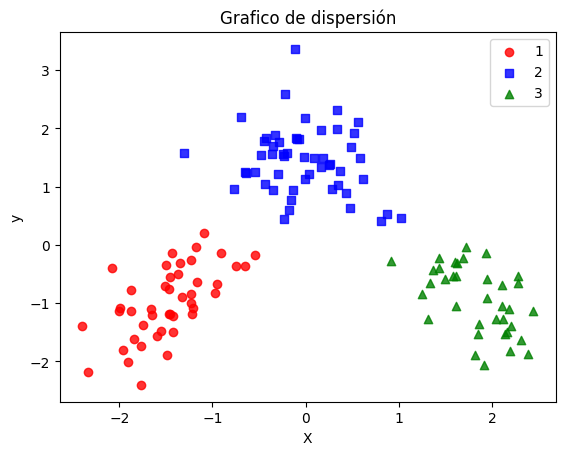

In [84]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for x, cl in enumerate(np.unique(y_train)):
    plt.scatter(x = X_train_lda[y_train == cl, 0], 
                y = X_train_lda[y_train == cl, 1],
                alpha=0.8, 
                c = colors[x],
                marker = markers[x], 
                label = cl)

plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.title("Grafico de dispersión")
plt.show()

## LDA usando Scikit-Learn

Usando la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), utilice el análisis discriminante lineal de scikit learn sobre `X_train_std`para obtener el mismo resultado. Compare los graficos de dispersión.

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Entrenamiento
lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)

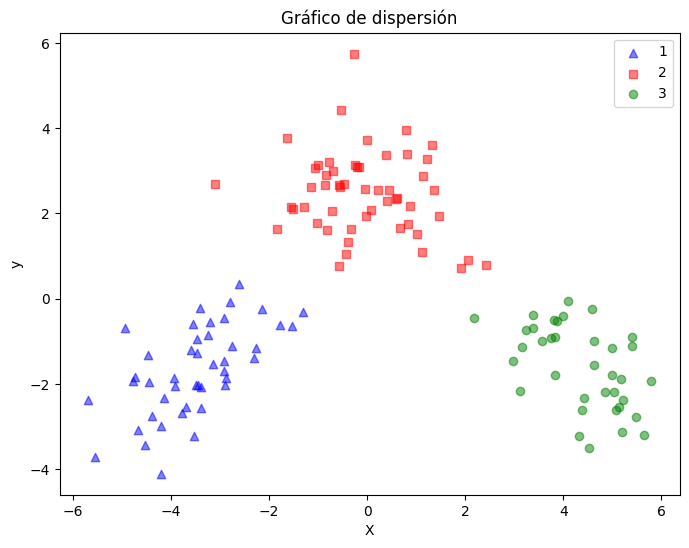

In [86]:
#Grafico los datos transformados (gráfico de dispersión)
plt.figure(figsize=(8, 6))
for label, marker, color in zip(
    range(1, 4), ('^', 's', 'o'), ('blue', 'red', 'green')
):
    plt.scatter(
        x=X_train_lda[:, 0][y_train == label],
        y=X_train_lda[:, 1][y_train == label] * -1,
        marker=marker,
        color=color,
        alpha=0.5,
        label=label,
    )

plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.title("Gráfico de dispersión")
plt.show()

Evalue el modelo con los datos de prueba `X_test_std` y calcule el `accuracy`

In [87]:
accuracy = lda.score(X_test_std, y_test)
accuracy

1.0